DBNOs - Number of enemy players knocked.                                                                                                        
assists - Number of enemy players this player damaged that were killed by teammates.                                                            
boosts - Number of boost items used.                                                                                                            
damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.                                                                    
headshotKills - Number of enemy players killed with headshots.                                                                                  
heals - Number of healing items used.                                                                                                          
Id - Player’s Id                                                                                                                               
killPlace - Ranking in match of number of enemy players killed.                                                                                
killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.                                                                      
killStreaks - Max number of enemy players killed in a short amount of time.                                                                    
kills - Number of enemy players killed.                                                                                                        
longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.                                                                                                          
matchDuration - Duration of match in seconds.                                                                                                  
matchId - ID to identify match. There are no matches that are in both the training and testing set.                                            
matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.                                                                                
rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution.  Value of -1 takes place of “None”.                                                                                                              
revives - Number of times this player revived teammates.                                                                                        
rideDistance - Total distance traveled in vehicles measured in meters.                                                                          
roadKills - Number of kills while in a vehicle.                                                                                                
swimDistance - Total distance traveled by swimming measured in meters.                                                                          
teamKills - Number of times this player killed a teammate.                                                                                      
vehicleDestroys - Number of vehicles destroyed.                                                                                                
walkDistance - Total distance traveled on foot measured in meters.                                                                              
weaponsAcquired - Number of weapons picked up.                                                                                                  
winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.                                                                        
groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.                                                                                                                                      
numGroups - Number of groups we have data for in the match.                                                                                    
maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.      
winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import zipfile

# Open the compressed file
zip_file = zipfile.ZipFile(r"C:\Users\Lenovo\Downloads\pubg-finish-placement-prediction.zip")

# Get a list of all CSV files in the compressed folder
csv_files = [f for f in zip_file.namelist() if f.endswith('.csv') and not f.startswith('sample')]

# Loop through each CSV file, read it into a pandas DataFrame, and append it to a list
df_list = []
for csv_file in csv_files:
    with zip_file.open(csv_file) as f:
        df = pd.read_csv(f)
        df_list.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

EDA

In [3]:
#first five records of the dataset
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,0,0.0,0,0.0,0,0,588.0,1,0,NaN
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,2,4669.0,0,0.0,0,0,2017.0,6,0,NaN
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,0,0.0,0,0.0,0,0,787.8,4,0,NaN
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,0,0.0,0,0.0,0,0,1812.0,3,0,NaN
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1,0.0,0,0.0,0,0,2963.0,4,0,NaN


In [4]:
#last five records of the dataset
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
6381135,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
6381136,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
6381137,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
6381138,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
6381139,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [5]:
#columns/features of the dataset
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [6]:
#descriptive statistics on the numeric data
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,...,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,6.381140e+06,4.446965e+06
mean,2.326442e-01,1.106135e+00,1.304211e+02,6.567463e-01,2.265150e-01,1.366465e+00,4.766442e+01,5.063531e+02,9.228354e-01,5.438431e-01,...,1.641619e-01,6.015306e+02,3.469599e-03,4.508096e+00,2.371379e-02,7.846247e-03,1.152715e+03,3.650516e+00,6.079448e+02,4.728216e-01
std,5.855683e-01,1.715198e+00,1.697747e+02,1.142104e+00,5.995127e-01,2.675665e+00,2.746306e+01,6.279108e+02,1.548017e+00,7.103783e-01,...,4.709790e-01,1.491292e+03,7.325512e-02,3.042979e+01,1.666980e-01,9.227485e-02,1.182340e+03,2.427451e+00,7.399957e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.548000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.837000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.173000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,2.050000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.974000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.700000e+01,3.300000e+01,6.616000e+03,5.900000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.174000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [9]:
#description of qualitative data
df.select_dtypes('object').describe()
#"Id" and "groupId" ->some of the players played in the same team
#"matchId" -> different players and groupes shared a game

,Id,groupId,matchId,matchType
count,6381140,6381140,6381140,6381140
unique,6381140,2912983,68521,16
top,9329eb41e215eb,14d6b54cdec6bc,c38511cbc262bc,squad-fpp
freq,1,74,100,2508323


In [10]:
#missing values
#all the missing values are in the target 'winPlacePerc'
df.isnull().sum()

Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
kills                    0
killStreaks              0
longestKill              0
matchDuration            0
matchType                0
maxPlace                 0
numGroups                0
rankPoints               0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints                0
winPlacePerc       1934175
dtype: int64

In [11]:
#percentage of null values 
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])

0.01045200225275929

In [12]:
#all ID values are unique-> no duplicates
df.nunique()

Id                 6381140
groupId            2912983
matchId              68521
assists                 26
boosts                  27
damageDealt          31325
DBNOs                   41
headshotKills           35
heals                   64
killPlace              101
killPoints            1768
kills                   60
killStreaks             19
longestKill          29311
matchDuration         1318
matchType               16
maxPlace               100
numGroups              100
rankPoints            2440
revives                 25
rideDistance         35911
roadKills               15
swimDistance         30196
teamKills               12
vehicleDestroys          6
walkDistance         40202
weaponsAcquired        100
winPoints             1516
winPlacePerc          3000
dtype: int64

In [13]:
#to confirm the result
df.duplicated().sum()

0

In [12]:
#most used match-> squad-fpp
df['matchType'].value_counts()

squad-fpp           2508323
duo-fpp             1438358
squad                902356
solo-fpp             772540
duo                  454526
solo                 259932
normal-squad-fpp      21335
crashfpp               8988
normal-duo-fpp         7165
flaretpp               3139
normal-solo-fpp        1781
flarefpp                855
normal-squad            702
crashtpp                549
normal-solo             384
normal-duo              207
Name: matchType, dtype: int64

In [13]:
#If the "rankPoints" feature has a value other than -1, then any value of 0 in
#the "killPoints" feature should be considered as "None". This means that if a 
#player has a non-negative rankPoints value, their killPoints should not be considered 
#for the purpose of evaluating their performance or skill level.
#same goes for "winPoints"

#I created a new dataset without the null values

In [14]:
x=(df['rankPoints']!=-1).sum()
x

3935261

In [15]:
y=(df['winPoints']==0).sum()
y

3804323

In [16]:
z=(df['killPoints']==0).sum()
z

3804323

In [7]:
df.loc[(df['rankPoints'] != -1) & (df['killPoints'] == 0), 'killPoints'] = np.nan
df.loc[(df['rankPoints'] != -1) & (df['winPoints'] == 0), 'winPoints'] = np.nan

In [18]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,0,0.0,0,0.0,0,0,588.0,1,NaN,NaN
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,2,4669.0,0,0.0,0,0,2017.0,6,NaN,NaN
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,0,0.0,0,0.0,0,0,787.8,4,NaN,NaN
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,0,0.0,0,0.0,0,0,1812.0,3,NaN,NaN
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1,0.0,0,0.0,0,0,2963.0,4,NaN,NaN


In [19]:
df.isnull().sum()

Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints         3804323
kills                    0
killStreaks              0
longestKill              0
matchDuration            0
matchType                0
maxPlace                 0
numGroups                0
rankPoints               0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints          3804323
winPlacePerc       1934175
dtype: int64

In [20]:
df.isnull().sum().sum()

9542821

In [21]:
#percentage of null values 
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])

0.05156802594888191

Correlation

In [22]:
corr_matrix = df.corr()
corr_matrix

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.309802,0.402189,0.301249,0.194916,0.228584,-0.289996,0.146701,0.314594,0.241676,...,0.198284,0.110549,0.011746,0.024086,0.005727,0.058568,0.292088,0.236400,0.089351,0.299441
boosts,0.309802,1.000000,0.525587,0.359591,0.336356,0.536587,-0.555790,0.172985,0.506334,0.405942,...,0.253156,0.328247,0.034763,0.108714,0.013169,0.087378,0.640172,0.412559,0.157208,0.634234
damageDealt,0.402189,0.525587,1.000000,0.739462,0.611465,0.343399,-0.680496,0.297773,0.888089,0.705057,...,0.258105,0.141770,0.052443,0.037824,0.015405,0.082114,0.401515,0.346133,0.136845,0.440507
DBNOs,0.301249,0.359591,0.739462,1.000000,0.471832,0.265294,-0.557157,0.279118,0.712183,0.648070,...,0.300188,0.102116,0.035858,0.018094,0.070285,0.060352,0.285395,0.218611,0.103425,0.279970
headshotKills,0.194916,0.336356,0.611465,0.471832,1.000000,0.199871,-0.471720,0.173204,0.672470,0.513230,...,0.150782,0.076625,0.012853,0.029156,0.008884,0.039478,0.253111,0.212183,0.074276,0.277722
heals,0.228584,0.536587,0.343399,0.265294,0.199871,1.000000,-0.386562,0.097594,0.312407,0.270230,...,0.236444,0.297398,0.024461,0.080950,0.035360,0.062546,0.430785,0.310944,0.102586,0.427857
killPlace,-0.289996,-0.555790,-0.680496,-0.557157,-0.471720,-0.386562,1.000000,-0.217566,-0.734716,-0.812027,...,-0.270205,-0.236149,-0.057081,-0.090134,-0.038028,-0.073397,-0.591646,-0.493854,-0.177086,-0.719069
killPoints,0.146701,0.172985,0.297773,0.279118,0.173204,0.097594,-0.217566,1.000000,0.268240,0.256525,...,0.090675,0.017420,0.007430,-0.008853,0.005139,0.019893,0.105196,0.044123,0.446030,0.112912
kills,0.314594,0.506334,0.888089,0.712183,0.672470,0.312407,-0.734716,0.268240,1.000000,0.804569,...,0.254691,0.115768,0.063690,0.040335,0.017448,0.080625,0.378415,0.328625,0.117427,0.419916
killStreaks,0.241676,0.405942,0.705057,0.648070,0.513230,0.270230,-0.812027,0.256525,0.804569,1.000000,...,0.241621,0.098625,0.065479,0.035071,0.027747,0.063987,0.328254,0.275070,0.107274,0.377566


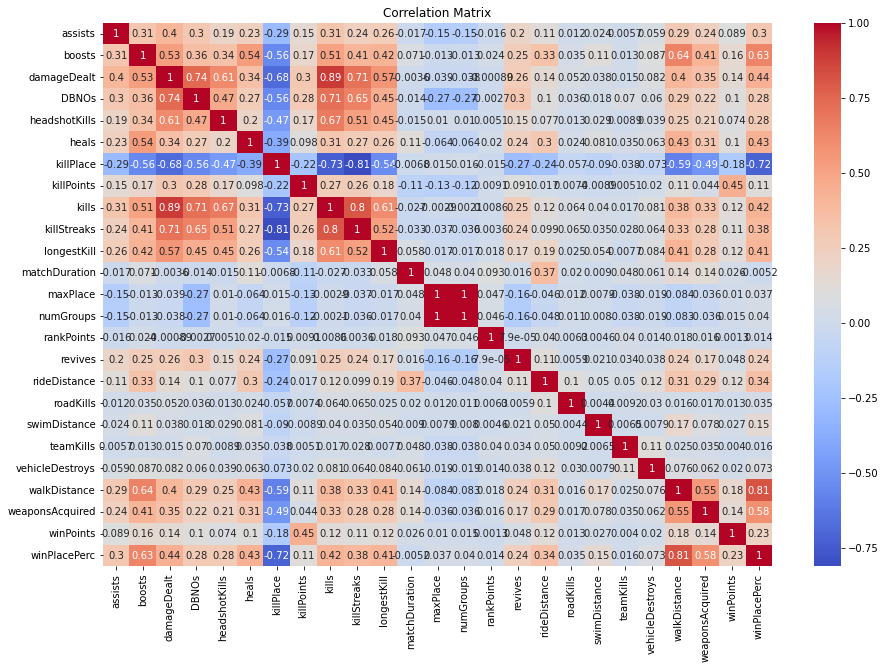

In [23]:
# Plot the correlation matrix using heatmap
fig, ax = plt.subplots(figsize=(15,10))    #size 
sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm')  #annot-> annotaded ,cmap-> color
plt.title('Correlation Matrix')
plt.show()

In [24]:
#'longestKill' and 'headshotKills' -> a good sniper
#'killPoints' and 'winPoints' -> all zeros are together =null values based on what I did above
#same goes for 'rankPoints' and 'killPoints', 'winPoints'
#'damageDealt' with 'longestKill' -> killing from a distance is hard (damage a lot till you kill him)
#'walkDistance' and 'winPlacePerc' -> that means that the player stayed in a remote areas away from from danger
#'boosts'and 'winPlacePerc'-> to increase the efficiency of the character or the weapons 
#'damageDealt' and 'DBNOs'->for exampel, knocking out a player more than once without killing him

In [51]:
win_corr= df.corr()['winPlacePerc'].abs().sort_values(ascending=True)
print('\nCorrelation values between "winPlacePerc" and other features:\n', win_corr)  #winPlacePerc is the target


Correlation values between "winPlacePerc" and other features:
 matchDuration      0.005171
winPoints          0.007061
killPoints         0.012908
rankPoints         0.013523
teamKills          0.015943
roadKills          0.034544
maxPlace           0.037377
numGroups          0.039621
vehicleDestroys    0.073436
swimDistance       0.149607
revives            0.240881
headshotKills      0.277722
DBNOs              0.279970
assists            0.299441
rideDistance       0.342915
killStreaks        0.377566
longestKill        0.410154
kills              0.419916
heals              0.427857
damageDealt        0.440507
weaponsAcquired    0.583806
boosts             0.634234
killPlace          0.719069
walkDistance       0.810888
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64


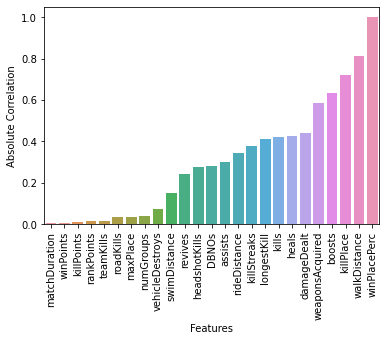

In [52]:
sns.barplot(x=win_corr.index , y=win_corr)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

In [3]:
df_sample=df.sample(1000) #because of the large amount of data

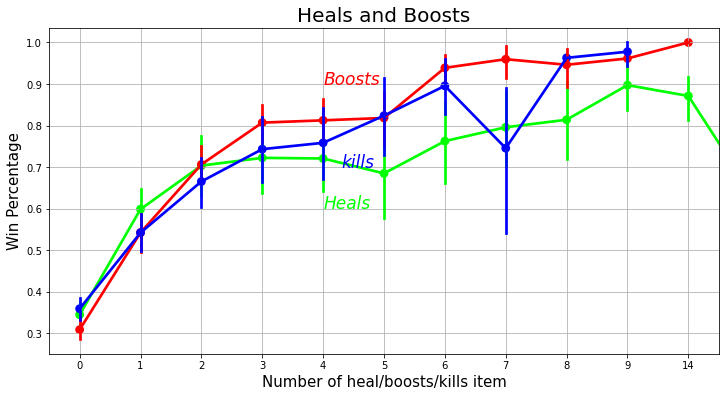

In [42]:
f,ax1=plt.subplots(figsize=(12,6))
sns.pointplot(x='heals',y='winPlacePerc',data=df_sample,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=df_sample,color='red',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=df_sample,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize=17,style='italic')
plt.text(4,0.9,'Boosts',color='red',fontsize=17,style='italic')
plt.text(4.3,0.7,'kills',color='blue',fontsize=17,style='italic')
plt.xlabel('Number of heal/boosts/kills item',fontsize=15)
plt.ylabel('Win Percentage',fontsize=15)
plt.title('Heals and Boosts',fontsize=20)
plt.grid()
plt.show()

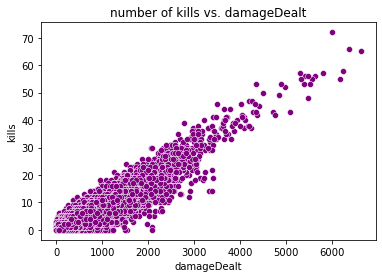

In [48]:
ax=sns.scatterplot(x='damageDealt',y='kills',data=df,color='purple')
ax.set_title("number of kills vs. damageDealt")
plt.show()

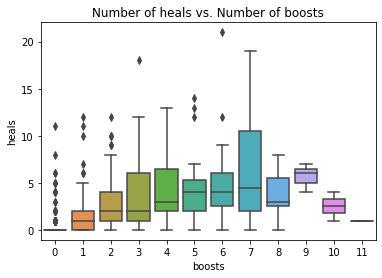

In [50]:
ax3 = sns.boxplot(x="boosts",y="heals", data = df_sample)
ax3.set_title("Number of heals vs. Number of boosts")
plt.show()

Extract five new features

In [8]:
#new feature where the duration of the match is measured in minutes
df['matchDurationMinutes']=df['matchDuration']/60

In [9]:
#new feature with the whole distance travelled
df['TotalDistance']=df['swimDistance']+df['walkDistance']+df['rideDistance']

In [10]:
#if the player is damaged then the damageDealt is subtracted
df['DamageDealtSubtracted'] = np.where(df['heals'] > 0, 'yes', 'no')

In [11]:
#total number of kills
df['TotalKills']=df['kills']+df['roadKills']+df['headshotKills']

In [12]:
#number of groups played in each match
df['numberOfGroups'] = df.groupby('matchId')['groupId'].transform('count')

In [13]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchDurationMinutes,TotalDistance,DamageDealtSubtracted,TotalKills,numberOfGroups
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,0,588.0,1,NaN,NaN,31.400000,588.0,no,0,92
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,0,2017.0,6,NaN,NaN,30.183333,6686.0,yes,2,96
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,0,787.8,4,NaN,NaN,29.883333,787.8,yes,0,94
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,0,1812.0,3,NaN,NaN,30.566667,1812.0,no,0,89
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,0,2963.0,4,NaN,NaN,22.100000,2963.0,yes,5,95


OUTLIERS

In [14]:
#function to calculate the outliers for each feature
def find_outliers(df):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = []
    for value in df:
        if value < lower_bound or value > upper_bound:
            outliers.append(value)
    
    return outliers

Away From Keyboard(AFK)

In [60]:
avg_distance_walked = pd.DataFrame(df.groupby('matchDuration')['walkDistance'].mean())
avg_distance_walked

,walkDistance
matchDuration,
9,0.000000
74,34.051000
118,80.891000
133,0.140000
152,41.950914
...,...
2214,1763.815657
2217,1517.716148
2218,1384.998570


In [15]:
#I dealt with the 'matchDuration' as intervals and if the player walked less than the 'walkDistance' avg -> AFK 
intervals = [0, 100, 500, 1000, 1500, 2000, 2500]

grouped_data = df.groupby(pd.cut(df['matchDuration'], bins=intervals)) #pd.cut() function assigns each value in the 
#'matchDuration' column to the corresponding interval .
afk = pd.DataFrame(columns=df.columns)

for interval, group in grouped_data:
    avg_distance = group['walkDistance'].mean()
    afk_players = group[group['walkDistance'] < (avg_distance / 2)]
    afk = pd.concat([afk, afk_players], ignore_index=True) #ignore_index -> to make new index numbering starting from 0

print(afk.Id)

0          bd80b3e038eb8d
1          0e7e961e18745f
2          f70c74418bb064
3          3c974082614279
4          4aacf65c561966
                ...      
3007889    3499cadf53d706
3007890    06052ed78bebc4
3007891    e32e145496bafb
3007892    6ffdd68101cd0c
3007893    722375f732f56e
Name: Id, Length: 3007894, dtype: object


In [144]:
x=df.sample(10000)

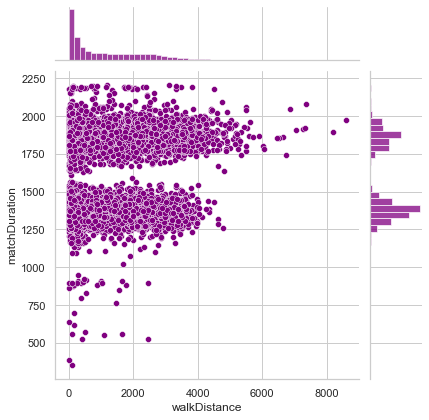

In [134]:
#plot (walkDistance, matchDuration) from a sample of the original data
sns.set(style="whitegrid") 
sns.jointplot(x="walkDistance",y="matchDuration",data=x,color='purple')
plt.show()
#from the matchDuration we conclude that the games with the longest duration are prefered

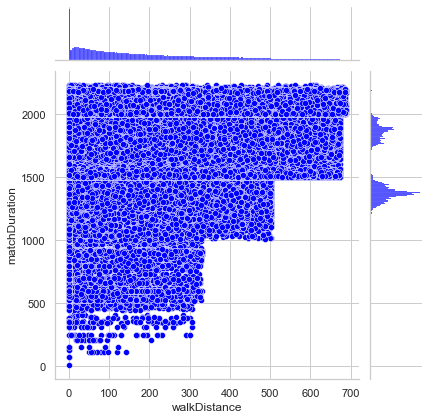

In [132]:
#plot (walkDistance, matchDuration) from the AFK data
sns.set(style="whitegrid") 
sns.jointplot(x="walkDistance",y="matchDuration",data=afk.sample(1000),color='blue')
plt.show()

HACKERSsns.jointplot(x="matchDuration", y="kills", data=df, height=10, ratio=3, color="r")
plt.show()

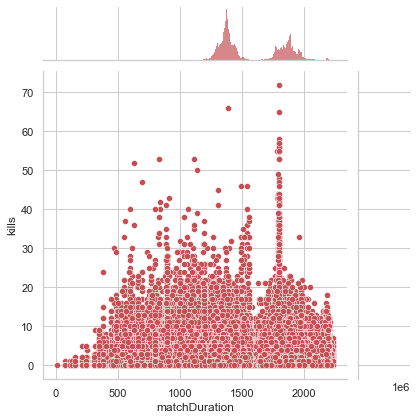

In [ ]:
#from this plot we can see who are the potential hackers
sns.jointplot(x="matchDuration", y="kills", data=df, color="r")
plt.show()

In [222]:
#I considered the players with higher that 20 kills in match duration less than the average are hackers
mean_kills = (df['kills']>3).mean()
mean_match_duration = df['matchDuration'].mean()

potential_hackers= pd.DataFrame(df[(df['kills'] > 20) & (df['matchDuration']< mean_match_duration)])

print("Hackers:")
print(potential_hackers[['Id', 'kills', 'walkDistance','matchDuration']])
#I got 335 hackers based on the number of records

Hackers:
                     Id  kills  walkDistance  matchDuration
23417    593bf4d799faf7     31        613.80           1497
41128    e0c3ebbe2332a6     30         92.77           1538
64451    060955cf849237     31       1185.00           1538
138840   27925caaf34b1c     28        230.40            598
189533   b5e7ddfcc222ee     26        359.60           1538
...                 ...    ...           ...            ...
6304055  4bada840dc3099     22       4521.00           1318
6325075  310cdfbe701f03     24       3180.00           1319
6333836  8800992f7dd530     26        111.80           1559
6336880  f69c34cce4d46a     28       1147.00           1059
6354737  0a2721fcf1cdd9     30        253.00            896

[335 rows x 4 columns]


 Prediction of the final placement from final in-game stats and initial player ratings

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the PUBG dataset
train=pd.read_csv(r"C:\Users\Lenovo\Downloads\train_V2.csv")


# Drop any rows with missing values
train.dropna(inplace=True)

# Split the dataset into features (X) and target (y)
X = train[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
         'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
         'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
         'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
         'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']]
y = train['winPlacePerc']


# Apply feature scaling to normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)



Mean Squared Error: 0.015963832657878273


In [4]:
pd.get_dummies(df_sample['matchId'])

,0090b84015ccc9,00c7a91f031075,00d055d4f7e111,00dfd4c3c0d54b,00e1616da36314,01128b97288cbe,014f0eac673783,01e673f6c71906,0219adeb247ade,02c119df7551bd,...,fe5af8032fd8be,fe75c49e04243a,fe96863d14d2c8,feef8b0170f4de,ff05c9c2f0b61f,ff32ea08ebc819,ff9f570b555d48,ffa6538b2f2ed8,ffb1140b24135e,fff4d3cbb6c317
867630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6286467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4278013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1594141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3343708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4686936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2504523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5271981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df['matchId'].map(df['matchId'].value_counts(normalize=True))

0          0.000014
1          0.000015
2          0.000015
3          0.000014
4          0.000015
             ...   
6381135    0.000015
6381136    0.000015
6381137    0.000015
6381138    0.000015
6381139    0.000015
Name: matchId, Length: 6381140, dtype: float64

For knowledge

In [36]:
df_sample=df.sample(1000) #because of the large amount of data

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df_sample['matchId']=encoder.fit_transform(df_sample[['matchId']])

In [35]:
df_sample['matchId']

5226256    0.001
1409695    0.001
5851737    0.001
2571312    0.001
4833190    0.001
           ...  
5550016    0.001
5325580    0.001
3083772    0.001
1382252    0.001
3329527    0.001
Name: matchId, Length: 1000, dtype: float64

In [34]:
values = (df_sample.groupby('matchId').size()) / len(df_sample)
df_sample['matchId'] = df_sample['matchId'].apply(lambda x : values[x])

In [42]:
df_sample['matchId'].map(df_sample['matchId'].value_counts(normalize=True))

2972716    0.001
5708803    0.001
3857004    0.001
629011     0.001
1241072    0.001
           ...  
4150046    0.001
1327311    0.001
2924613    0.001
2001750    0.001
2896078    0.001
Name: matchId, Length: 1000, dtype: float64

In [6]:
#A new column
df['Active']=None  #to create a new column without filling
df['Active'].loc[(df['kills']>0)]=1
df['Active'].loc[(df['kills']==0)]=0

In [7]:
df['Active']

0          0
1          1
2          0
3          0
4          1
          ..
6381135    0
6381136    0
6381137    0
6381138    1
6381139    1
Name: Active, Length: 6381140, dtype: object

In [8]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Active
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,0.0,0,0.0,0,0,588.0,1,0,NaN,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,4669.0,0,0.0,0,0,2017.0,6,0,NaN,1
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,0.0,0,0.0,0,0,787.8,4,0,NaN,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,0.0,0,0.0,0,0,1812.0,3,0,NaN,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,0.0,0,0.0,0,0,2963.0,4,0,NaN,1
